# Lending Club Case Study Analysis

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings as wn
wn.filterwarnings('ignore')

In [2]:
loandata = pd.read_csv('loan.csv')

In [3]:
loandata

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [4]:
loandata.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Dropping columns which have all null values

In [5]:
loandata = loandata.dropna(axis = 1, how = 'all')

In [6]:
loandata.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [7]:
single_value_columns = loandata.columns[loandata.nunique() == 1]

In [8]:
single_value_columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

#### Dropping columns which have only 1 single value and not useful to analysis

In [9]:
loandata = loandata.drop(single_value_columns, axis = 1)

In [10]:
loandata.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [11]:
unnecessary_columns = ['id','member_id','emp_title','issue_d','url','desc','title','zip_code','addr_state',
                       'earliest_cr_line','mths_since_last_delinq','mths_since_last_record','last_pymnt_d',
                       'next_pymnt_d','last_credit_pull_d']

In [12]:
len(unnecessary_columns)

15

#### Dropping columns which are not necessary for analysis

In [13]:
loandata = loandata.drop(unnecessary_columns, axis = 1)

In [14]:
loandata.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pym

In [15]:
post_loan_columns = ['funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt_inv','recoveries',
                     'collection_recovery_fee','last_pymnt_amnt','total_pymnt','total_rec_prncp',
                     'total_rec_int','total_rec_late_fee']

#### Dropping columns which are post loan attributes which are not helpful in analysis

In [16]:
loandata = loandata.drop(post_loan_columns, axis = 1)

In [17]:
loandata.isnull().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [18]:
loandata.shape

(39717, 22)

In [19]:
loandata['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

#### Our Analysis shall be performed on completed loan records. Hence, Dropping the rows which are having 'Current' value for loan_status. #### 

In [20]:
loandata = loandata[loandata['loan_status'] != "Current"]

In [21]:
loandata.shape

(38577, 22)

## Data Manipulation

### Data Filling

In [22]:
loandata.isnull().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [23]:
loandata['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [24]:
loandata['emp_length'].mode()[0]

'10+ years'

#### Due to significant records having null values are present in emp_length, we'll not be removing the records. Instead, we'll fill emp_length values with the modal emp_length values

In [25]:
loandata['emp_length'] = loandata['emp_length'].fillna(loandata['emp_length'].mode()[0])

In [26]:
loandata['emp_length'].value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [27]:
loandata['revol_util'].mode()

0    0%
Name: revol_util, dtype: object

### Data Removal

#### Due to insignificant number of records having null values are present in revol_util, we'll be removing the records.

In [28]:
loandata = loandata.dropna(subset = ['revol_util'])

In [29]:
def high_frequency_counts(df):
    frequency_counts = {}
    for column in df.columns:
        frequency_counts[column] = df[column].value_counts().iloc[0]
    return frequency_counts

In [30]:
high_frequency_counts(loandata)

{'loan_amnt': 2808,
 'funded_amnt': 2718,
 'term': 29049,
 'int_rate': 913,
 'installment': 68,
 'grade': 11674,
 'sub_grade': 2873,
 'emp_length': 9517,
 'home_ownership': 18448,
 'annual_inc': 1466,
 'verification_status': 16665,
 'loan_status': 32916,
 'purpose': 18043,
 'dti': 171,
 'delinq_2yrs': 34340,
 'inq_last_6mths': 18688,
 'open_acc': 3907,
 'pub_rec': 36459,
 'revol_bal': 923,
 'revol_util': 954,
 'total_acc': 1423,
 'pub_rec_bankruptcies': 36189}

In [31]:
dict(sorted(high_frequency_counts(loandata).items(), key=lambda item: item[1], reverse=True))

{'pub_rec': 36459,
 'pub_rec_bankruptcies': 36189,
 'delinq_2yrs': 34340,
 'loan_status': 32916,
 'term': 29049,
 'inq_last_6mths': 18688,
 'home_ownership': 18448,
 'purpose': 18043,
 'verification_status': 16665,
 'grade': 11674,
 'emp_length': 9517,
 'open_acc': 3907,
 'sub_grade': 2873,
 'loan_amnt': 2808,
 'funded_amnt': 2718,
 'annual_inc': 1466,
 'total_acc': 1423,
 'revol_util': 954,
 'revol_bal': 923,
 'int_rate': 913,
 'dti': 171,
 'installment': 68}

#### The above columns sorted dictionary shows the variables and their highest frequency count of their values. To simplify our analysis, we'll be removing the columns which have their modal values with more than 90% frequency

In [32]:
more_than_90per_columns = ['pub_rec','pub_rec_bankruptcies']

In [33]:
loandata = loandata.drop(more_than_90per_columns, axis = 1)

### Data Standardization

#### Converting object type value to float type value for int_rate variable

In [34]:
loandata['int_rate'] = loandata['int_rate'].apply(lambda x : float(x.replace('%','')))

#### Converting object type value to float type value for revol_util variable

In [35]:
loandata['revol_util'] = loandata['revol_util'].apply(lambda x : float(x.replace('%','')))

In [36]:
def emp_length_to_int(term):
    s0 = term.replace('< 1 year','0')
    s1 = s0.replace('years','')
    s2 = s1.replace('year','')
    s3 = s2.replace('+','')
    s4 = s3.replace(' ','')
    return(int(s4))

#### Converting object type value to int type value for emp_length variable

In [37]:
loandata['emp_length'] = loandata['emp_length'].apply(emp_length_to_int)

In [38]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt          38527 non-null  int64  
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  float64
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  int64  
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  loan_status          38527 non-null  object 
 12  purpose              38527 non-null  object 
 13  dti                  38527 non-null  float64
 14  delinq_2yrs          38527 non-null  int64  
 15  inq_last_6mths       38527 non-null  int6

### Fixing Outliers

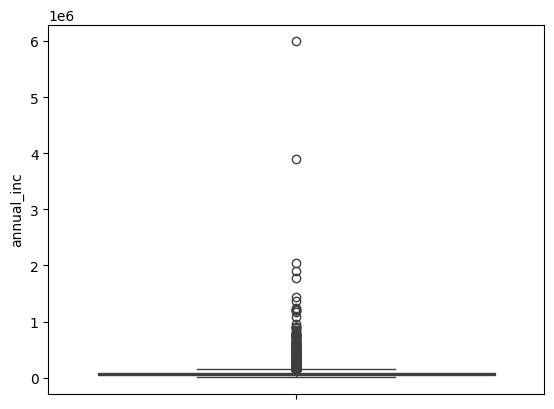

In [39]:
sns.boxplot(loandata['annual_inc'])
plt.show()

In [40]:
loandata['annual_inc'].describe()

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [41]:
def upperFence(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    uf = q3 + (1.5 * iqr)
    return(uf)

In [42]:
upperFence(loandata['annual_inc'])

145000.0

#### Removing all outliers above the upper fence value for annual_inc

In [43]:
loandata = loandata[loandata['annual_inc'] <= upperFence(loandata['annual_inc'])]

In [44]:
loandata.shape

(36766, 20)

## Univariate Analysis

### Target Variable Analysis: loan_status 

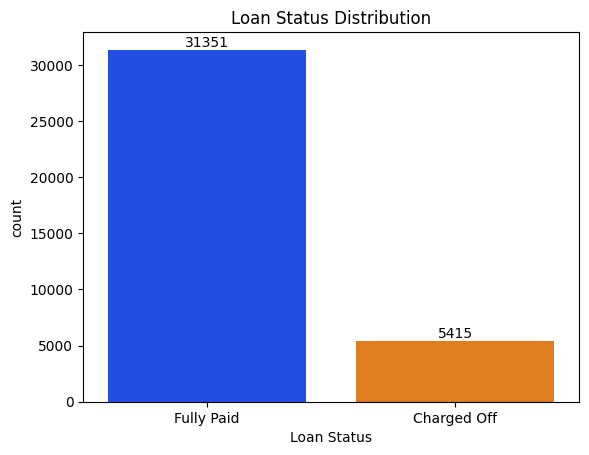

In [45]:
ax = sns.countplot(x = 'loan_status', data = loandata, palette = 'bright')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.show()

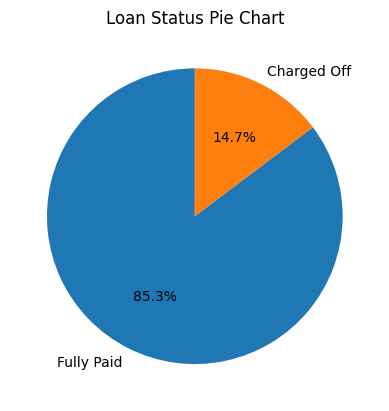

In [46]:
loan_status_counts = loandata['loan_status'].value_counts()
plt.pie(loan_status_counts, 
        labels=loan_status_counts.index, 
        autopct='%1.1f%%',
        startangle=90)
plt.title('Loan Status Pie Chart')
plt.show()

### Categorical Feature Variable Analysis

#### 1. Loan Term

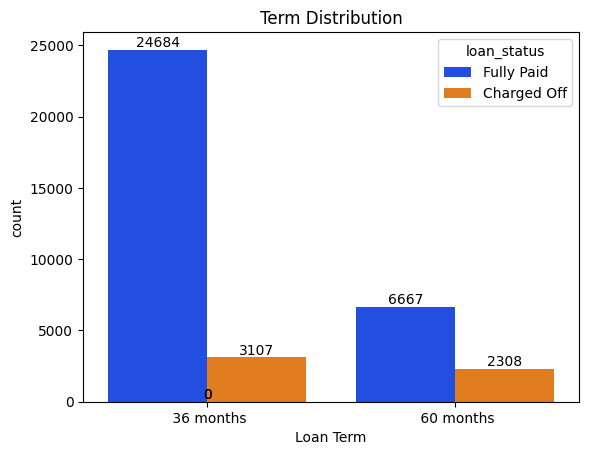

In [47]:
ax = sns.countplot(x = 'term', data = loandata, palette = 'bright', hue='loan_status')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Term Distribution')
plt.xlabel('Loan Term')
plt.show()

#### 2. Loan Grade

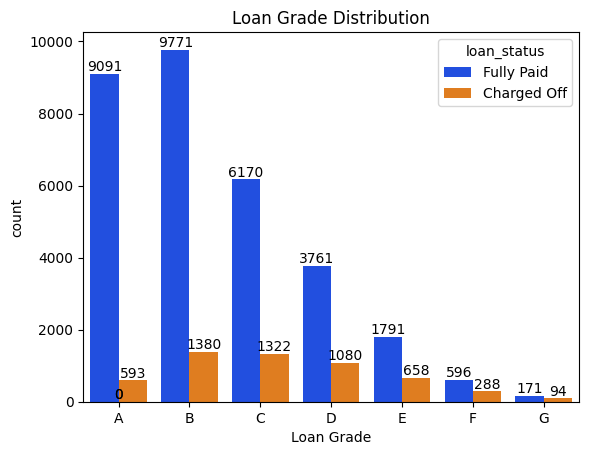

In [48]:
ax = sns.countplot(x = 'grade', data = loandata, palette = 'bright', hue='loan_status',order=['A','B','C','D','E','F','G'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Loan Grade Distribution')
plt.xlabel('Loan Grade')
plt.show()

#### 3. Loan Sub-Grade

In [49]:
loandata['sub_grade'] = loandata['sub_grade'].apply(lambda x : x[-1])

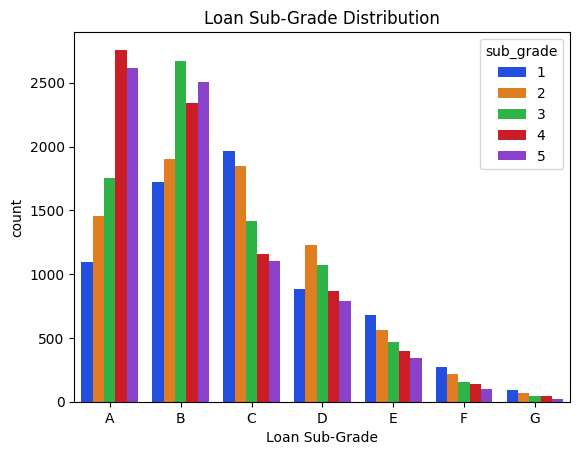

In [50]:
sns.set_palette('bright')
sns.countplot(data = loandata, x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade', hue_order=['1','2','3','4','5'])
plt.title('Loan Sub-Grade Distribution')
plt.xlabel('Loan Sub-Grade')
plt.show()

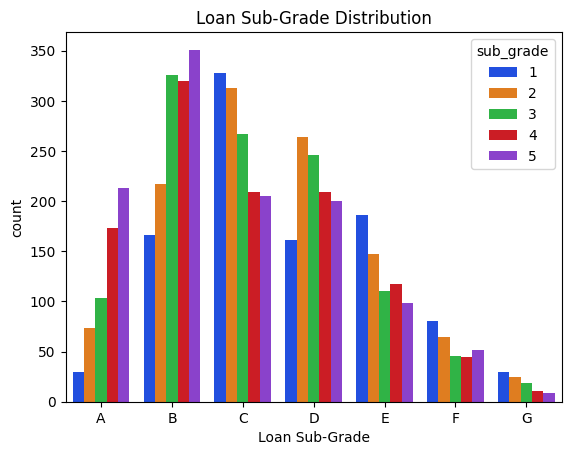

In [51]:
sns.set_palette('bright')
sns.countplot(data = loandata[loandata['loan_status']=='Charged Off'], x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
              hue = 'sub_grade', hue_order=['1','2','3','4','5'])
plt.title('Loan Sub-Grade Distribution')
plt.xlabel('Loan Sub-Grade')
plt.show()

#### 4. Home Ownership

In [52]:
loandata['home_ownership'].value_counts()

home_ownership
RENT        18031
MORTGAGE    15784
OWN          2857
OTHER          91
NONE            3
Name: count, dtype: int64

Replacing 'NONE' values to modal value of home_ownership

In [53]:
loandata['home_ownership'] = loandata['home_ownership'].replace(to_replace = ['NONE'], value = loandata['home_ownership'].mode()[0])

In [54]:
loandata['home_ownership'].value_counts()

home_ownership
RENT        18034
MORTGAGE    15784
OWN          2857
OTHER          91
Name: count, dtype: int64

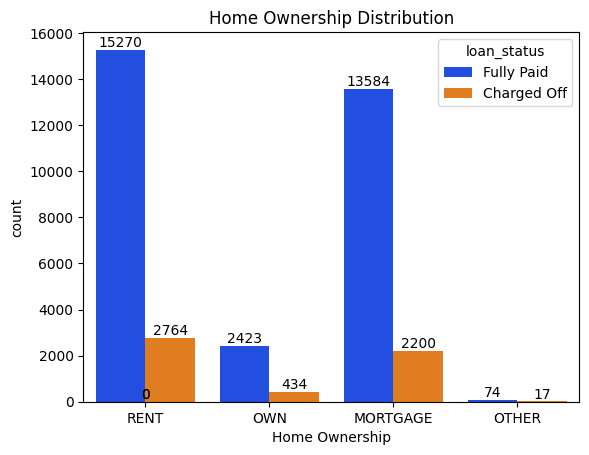

In [55]:
ax = sns.countplot(x = 'home_ownership', data = loandata, palette = 'bright', hue='loan_status')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership')
plt.show()

#### 5. Verification Status

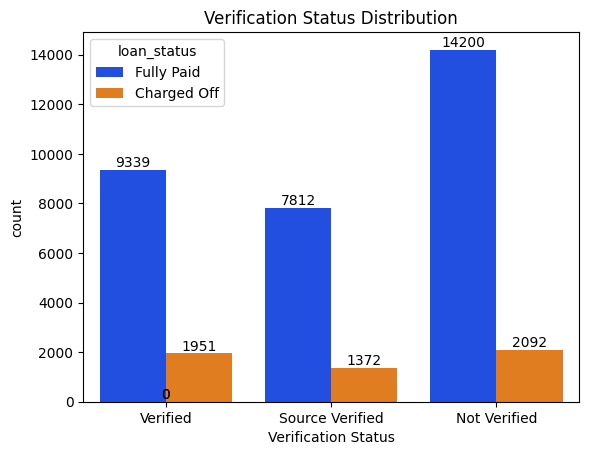

In [56]:
ax = sns.countplot(x = 'verification_status', data = loandata, palette = 'bright', hue='loan_status')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Verification Status Distribution')
plt.xlabel('Verification Status')
plt.show()

#### 6. Loan Purpose

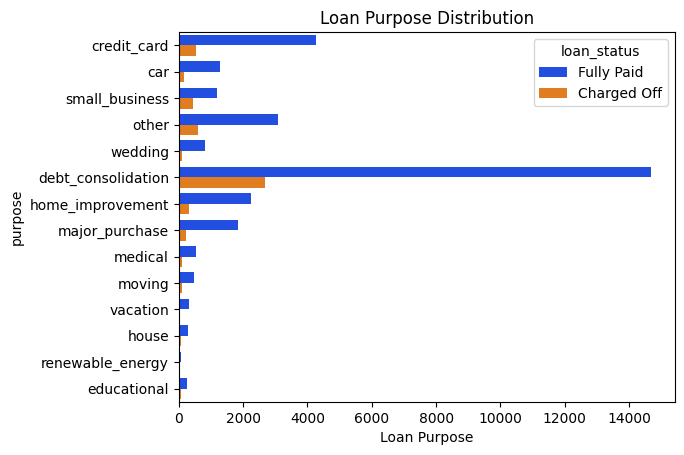

In [57]:
ax = sns.countplot(y = 'purpose', data = loandata, palette = 'bright', hue='loan_status')
plt.title('Loan Purpose Distribution')
plt.xlabel('Loan Purpose')
plt.show()

### Numerical Feature Variable Analysis - Segmented Analysis

#### 1. Applied Loan Amount

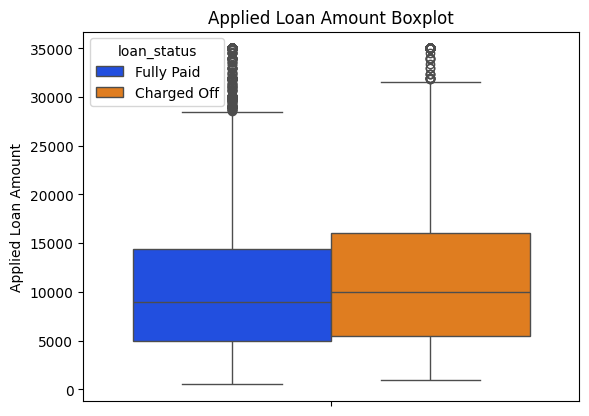

In [58]:
sns.boxplot(data=loandata, y='loan_amnt', palette = 'bright', hue='loan_status')
plt.title('Applied Loan Amount Boxplot')
plt.ylabel('Applied Loan Amount')
plt.show()

#### 2. Funded Loan Amount

In [59]:
loandata['funded_amnt_batch'] = pd.cut(loandata['funded_amnt'], bins=7,
                                            labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

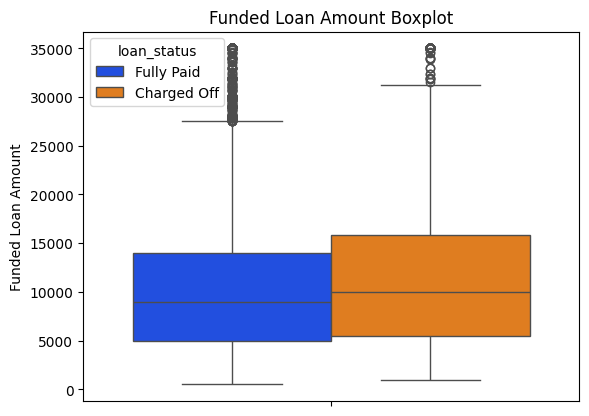

In [60]:
sns.boxplot(data=loandata, y='funded_amnt', palette = 'bright', hue='loan_status')
plt.title('Funded Loan Amount Boxplot')
plt.ylabel('Funded Loan Amount')
plt.show()

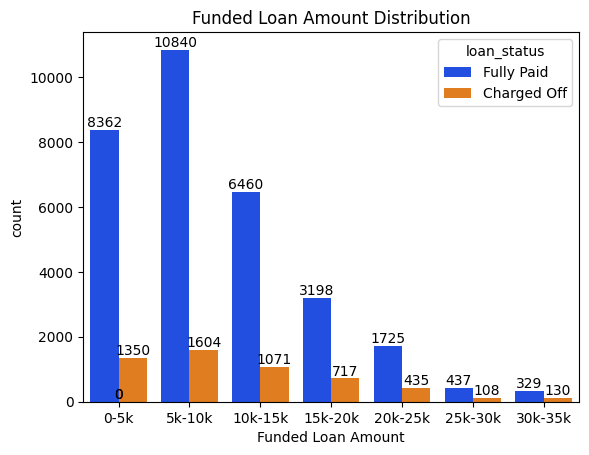

In [61]:
ax = sns.countplot(x = 'funded_amnt_batch', data = loandata, palette = 'bright', hue='loan_status')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Funded Loan Amount Distribution')
plt.xlabel('Funded Loan Amount')
plt.show()

#### 3. Interest Rate

In [62]:
loandata['int_rate_batch'] = pd.cut(loandata['int_rate'], bins=[5,7.5,10,12.5,15,17.5,20,22.5,25],
                                     labels=['5%-7.5%','7.5%-10%','10%-12.5%','12.5%-15%','15%-17.5%',
                                             '17.5%-20%','20%-22.5%','22.5%-25%'])

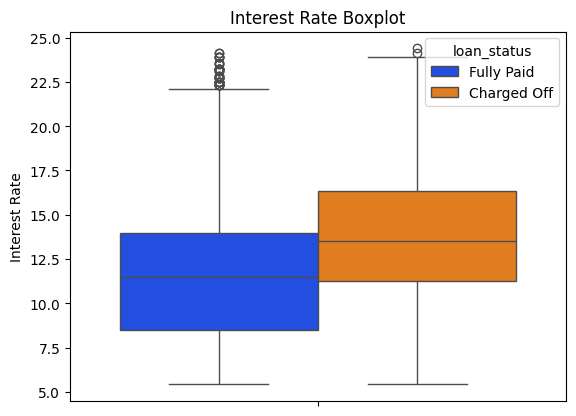

In [63]:
sns.boxplot(data=loandata, y='int_rate', palette = 'bright', hue='loan_status')
plt.title('Interest Rate Boxplot')
plt.ylabel('Interest Rate')
plt.show()

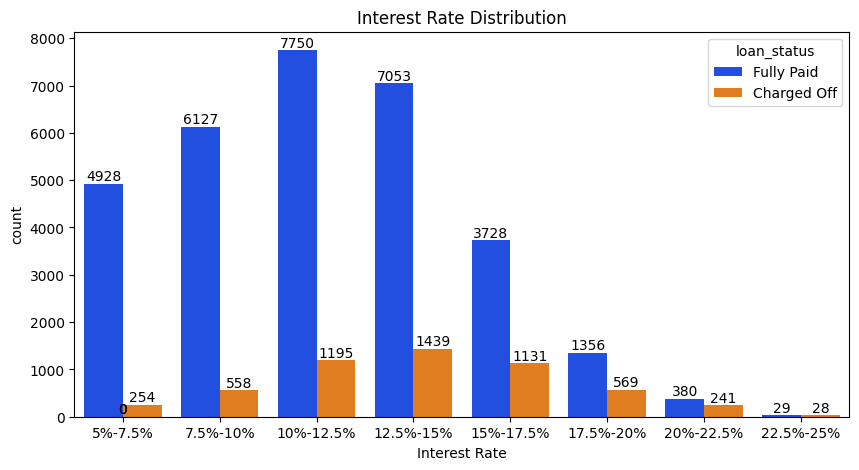

In [64]:
ax = sns.countplot(x = 'int_rate_batch', data = loandata, palette = 'bright', hue='loan_status')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.gcf().set_size_inches(10, 5)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.show()

#### 4. Installment

In [65]:
loandata['installment_batch'] = pd.cut(loandata['installment'], bins=[0,200,400,600,800,1000,1200,1400],
                                     labels=['0-200','200-400','400-600','600-800','800-1000','1000-1200','1200-1400'])

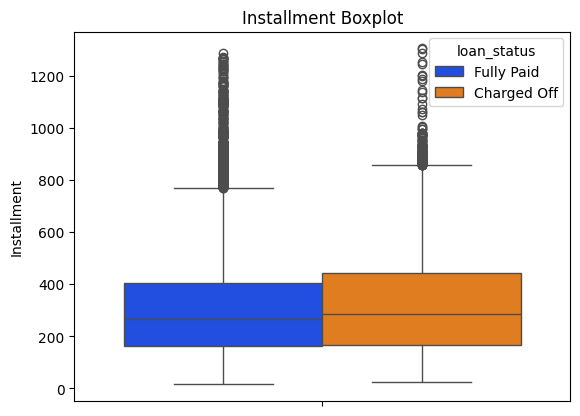

In [66]:
sns.boxplot(data=loandata, y='installment', palette = 'bright', hue='loan_status')
plt.title('Installment Boxplot')
plt.ylabel('Installment')
plt.show()

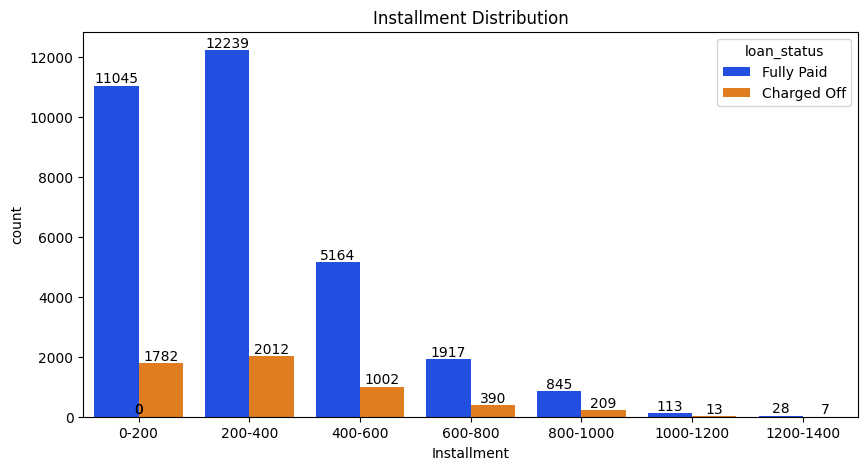

In [67]:
ax = sns.countplot(x = 'installment_batch', data = loandata, palette = 'bright', hue='loan_status')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.gcf().set_size_inches(10, 5)
plt.title('Installment Distribution')
plt.xlabel('Installment')
plt.show()

#### 5. Employment Length

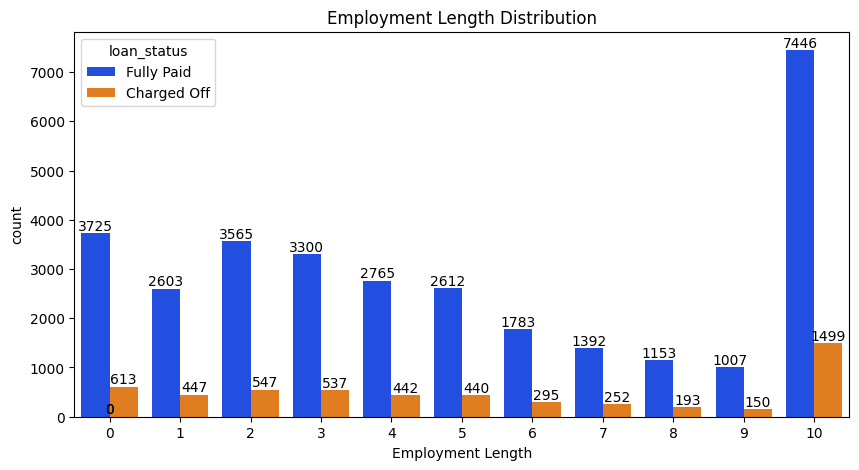

In [68]:
ax = sns.countplot(x = 'emp_length', data = loandata, palette = 'bright', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.gcf().set_size_inches(10, 5)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length')
plt.show()

#### 6. Annual Income

In [69]:
loandata['annual_inc_batch'] = pd.cut(loandata['annual_inc'], bins=[0,20000,40000,60000,80000,100000,120000,140000,160000],
                                     labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k','140k-160k'])

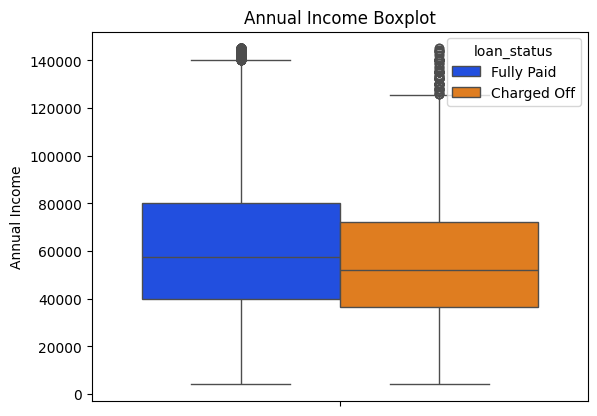

In [70]:
sns.boxplot(data=loandata, y='annual_inc', palette = 'bright', hue='loan_status')
plt.title('Annual Income Boxplot')
plt.ylabel('Annual Income')
plt.show()

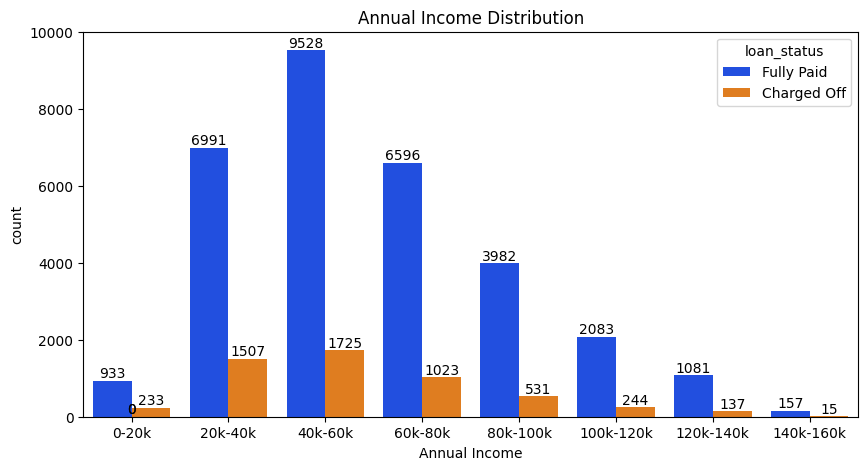

In [71]:
ax = sns.countplot(x = 'annual_inc_batch', data = loandata, palette = 'bright', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.gcf().set_size_inches(10, 5)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.show()

#### 7. Debt-To-Income Ratio

In [72]:
loandata['dti_batch'] = pd.cut(loandata['dti'], bins=[0,5,10,15,20,25,30],
                                     labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

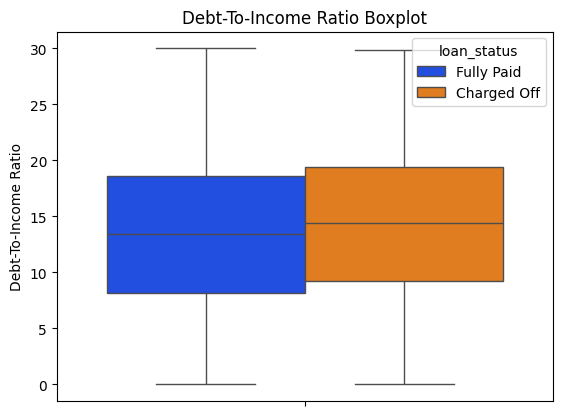

In [73]:
sns.boxplot(data=loandata, y='dti', palette = 'bright', hue='loan_status')
plt.title('Debt-To-Income Ratio Boxplot')
plt.ylabel('Debt-To-Income Ratio')
plt.show()

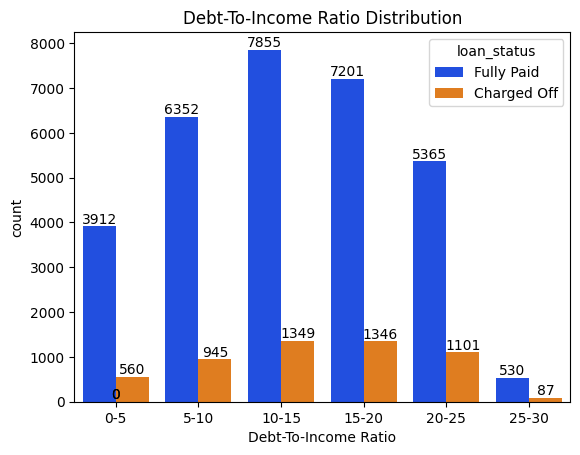

In [74]:
ax = sns.countplot(x = 'dti_batch', data = loandata, palette = 'bright', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Debt-To-Income Ratio Distribution')
plt.xlabel('Debt-To-Income Ratio')
plt.show()

#### 8. Open Credit Lines

In [75]:
loandata['open_acc_batch'] = pd.cut(loandata['open_acc'], bins=[0,5,10,15,20,25,30,35,40,45],
                                     labels=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45'])

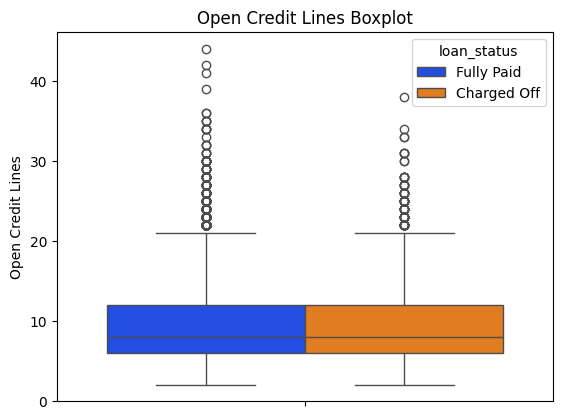

In [76]:
sns.boxplot(data=loandata, y='open_acc', palette = 'bright', hue='loan_status')
plt.title('Open Credit Lines Boxplot')
plt.ylabel('Open Credit Lines')
plt.show()

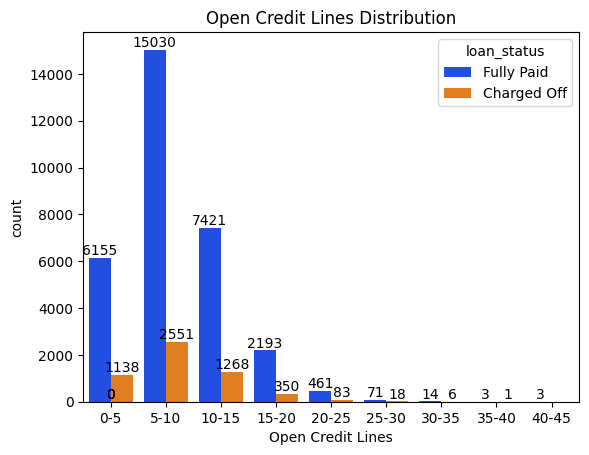

In [77]:
ax = sns.countplot(x = 'open_acc_batch', data = loandata, palette = 'bright', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Open Credit Lines Distribution')
plt.xlabel('Open Credit Lines')
plt.show()

#### 9. Total Credit Lines

In [78]:
loandata['total_acc_batch'] = pd.cut(loandata['total_acc'], bins=[0,10,20,30,40,50,60,70,80,90],
                                     labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])

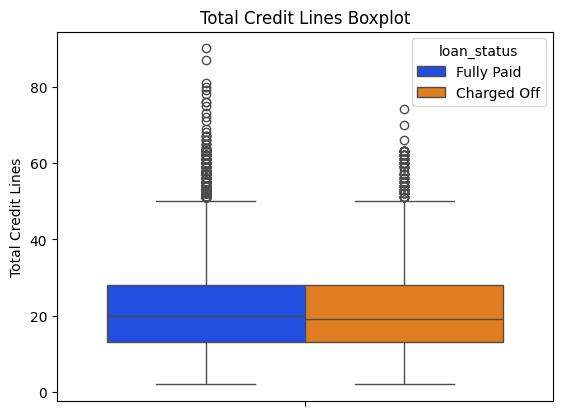

In [79]:
sns.boxplot(data=loandata, y='total_acc', palette = 'bright', hue='loan_status')
plt.title('Total Credit Lines Boxplot')
plt.ylabel('Total Credit Lines')
plt.show()

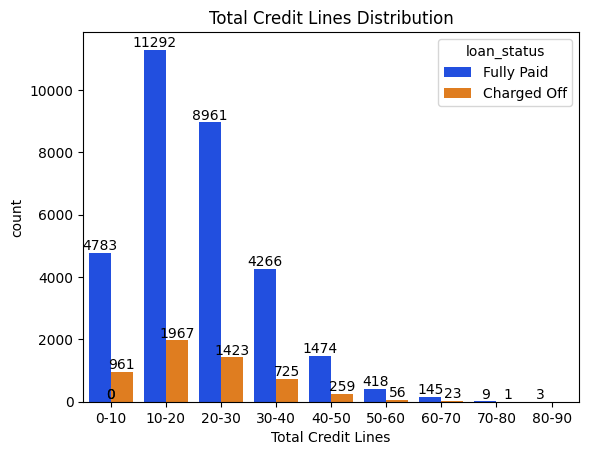

In [80]:
ax = sns.countplot(x = 'total_acc_batch', data = loandata, palette = 'bright', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Total Credit Lines Distribution')
plt.xlabel('Total Credit Lines')
plt.show()

#### 10. Credit Revolving Balance

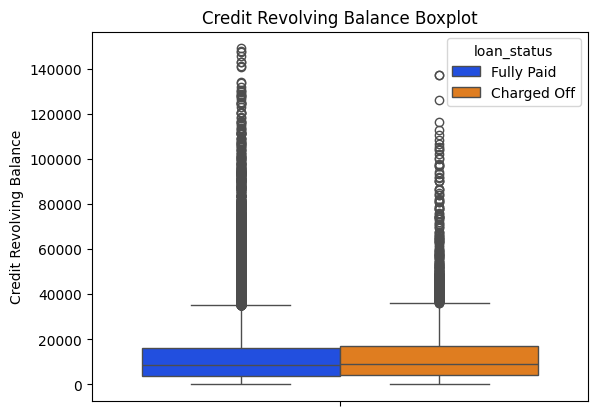

In [81]:
sns.boxplot(data=loandata, y='revol_bal', palette = 'bright', hue='loan_status')
plt.title('Credit Revolving Balance Boxplot')
plt.ylabel('Credit Revolving Balance')
plt.show()

#### 11. Credit Revolving Utilization

In [82]:
loandata['revol_util_batch'] = pd.cut(loandata['revol_util'], bins=[0,20,40,60,80,100],
                                     labels=['0-20','20-40','40-60','60-80','80-100'])

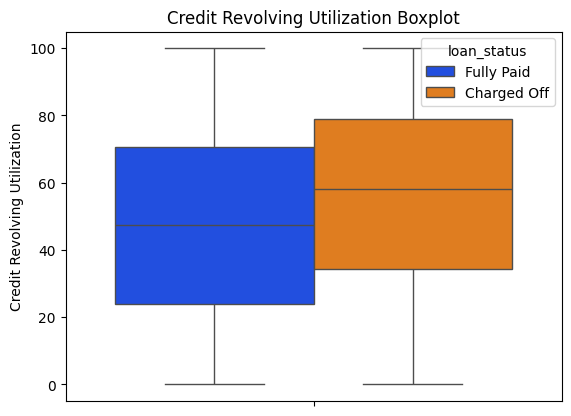

In [83]:
sns.boxplot(data=loandata, y='revol_util', palette = 'bright', hue='loan_status')
plt.title('Credit Revolving Utilization Boxplot')
plt.ylabel('Credit Revolving Utilization')
plt.show()

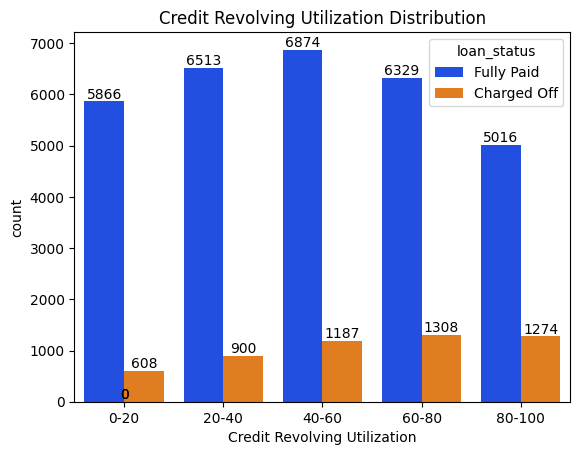

In [84]:
ax = sns.countplot(x = 'revol_util_batch', data = loandata, palette = 'bright', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Credit Revolving Utilization Distribution')
plt.xlabel('Credit Revolving Utilization')
plt.show()

#### 12. Last 2 Years Delinquency

In [85]:
loandata['delinq_2yrs_group'] = loandata['delinq_2yrs'].apply(lambda x: 'Zero' if x == 0 else 'More than Zero')

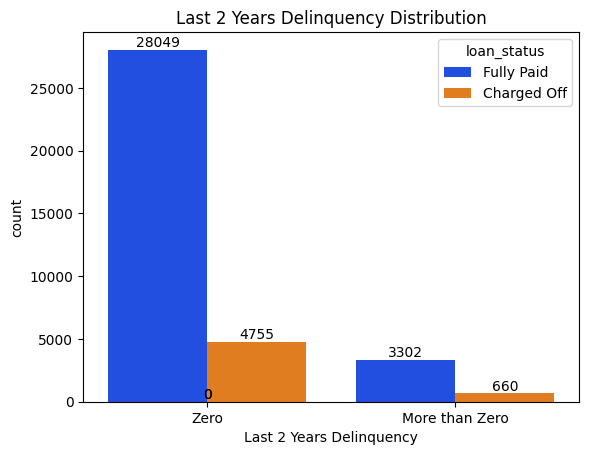

In [86]:
ax = sns.countplot(x = 'delinq_2yrs_group', data = loandata, palette = 'bright', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Last 2 Years Delinquency Distribution')
plt.xlabel('Last 2 Years Delinquency')
plt.show()

#### 13. Inquires in Last 6 months

In [87]:
loandata['inq_last_6mths_group'] = loandata['inq_last_6mths'].apply(lambda x: 'Zero' if x == 0 else 'More than Zero')

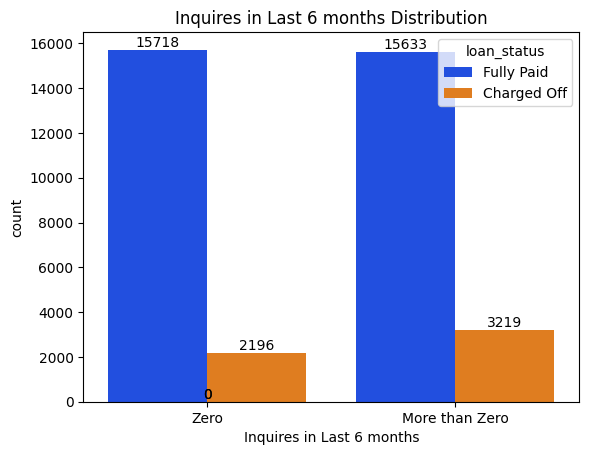

In [88]:
ax = sns.countplot(x = 'inq_last_6mths_group', data = loandata, palette = 'bright', order = ['Zero','More than Zero'],
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
plt.title('Inquires in Last 6 months Distribution')
plt.xlabel('Inquires in Last 6 months')
plt.show()

### Results of Univariate Analysis

#### The above analysis of the 'Fully Paid' and 'Charged Off' status based loan records for each variable derives the following results. A loan record is highly probable of being 'Charged Off':

##### Categorical Variables:
- If Loan Term is of 60 months
- If Loan Grade is 'B','C' or 'D' and Sub-Grade is B5
- If Home ownership type is 'RENT' or 'MORTGAGE'
- If Income sources are Not Verified
- If Purpose of Loan is to clear personal debts and credit card bills

##### Numerical Variables:
- If both Applied and Funded Loan Amount is between 5000-15000
- If Interest Rate is between 12.5-17.5%
- If Monthly Installments are between 20-400
- If Employment Length is more than 10 years and less than 1 year
- If Annual Income is in range 40000-60000
- If Debt-to-Income ratio is more than 12.5%
- If Open Credit lines are between 5-15
- If Total Credit lines are between 10-30
- If Credit Revolving Balance is less than 20000
- If Credit Revolving Utilization is more than 40%
- If Delinquency count over last 2 years is more than Zero
- If Number of inquiries in last 6 months is more than Zero

## Bivariate Analysis

#### Driver Variables Selected: 
##### 1. funded_amnt
##### 2. term
##### 3. int_rate
##### 4. grade
##### 5. home_ownership
##### 6. annual_inc
##### 7. purpose

#### The company sanctions the loan with funded_amnt and int_rate as the primary variables. So, we will be performing our bivariate analysis on these 2 variables with respect to other driver variables

In [89]:
loandata['loan_status_group'] = loandata['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

### 1. Funded Loan Amount

#### 1.1 Funded Loan Amount V/s Interest Rate

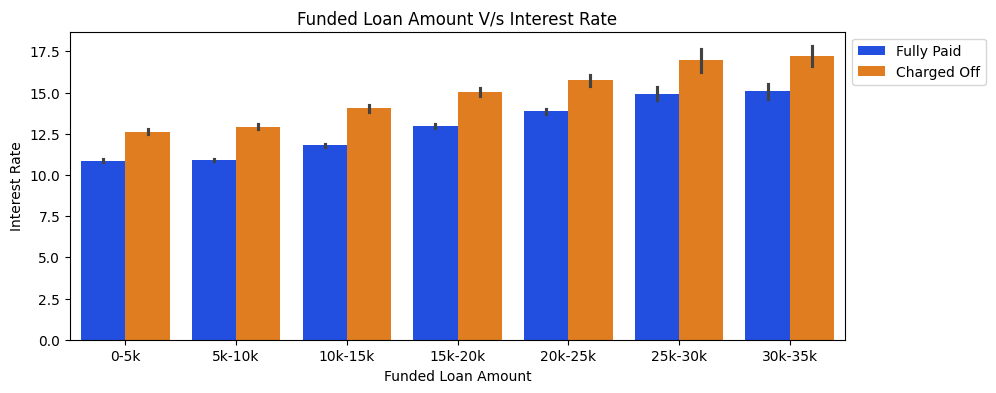

In [90]:
ax = sns.barplot(x = 'funded_amnt_batch', y = 'int_rate', data = loandata, palette = 'bright',
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.gcf().set_size_inches(10, 4)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Funded Loan Amount V/s Interest Rate')
plt.xlabel('Funded Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

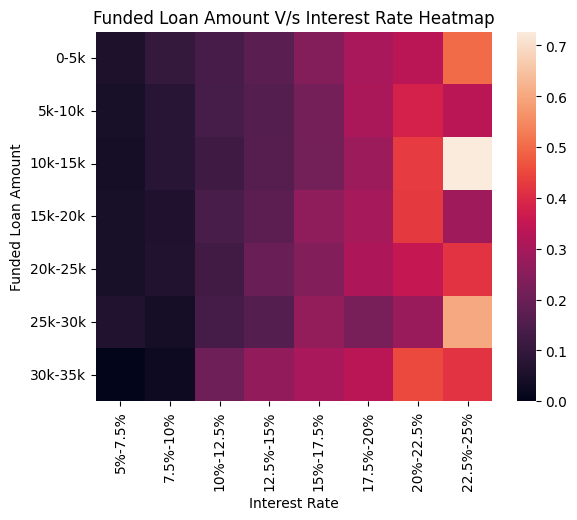

In [91]:
sns.heatmap(pd.pivot_table(data=loandata,index='funded_amnt_batch',columns='int_rate_batch',values='loan_status_group'))
plt.title('Funded Loan Amount V/s Interest Rate Heatmap')
plt.xlabel('Interest Rate')
plt.ylabel('Funded Loan Amount')
plt.show()

#### 1.2 Funded Loan Amount V/s Loan Grade

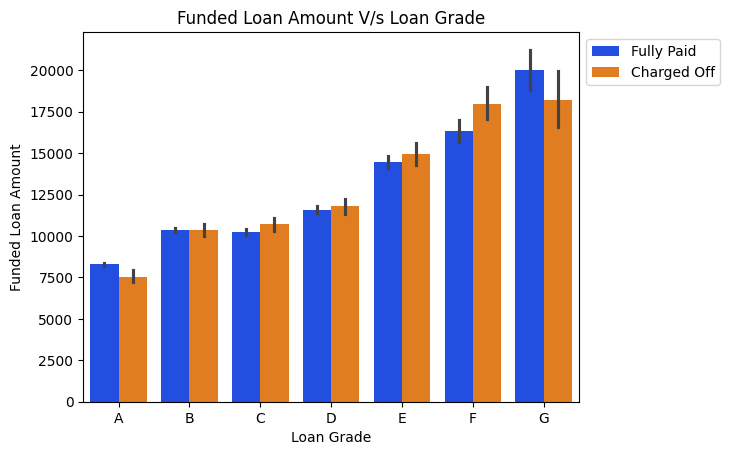

In [92]:
ax = sns.barplot(x = 'grade', y = 'funded_amnt', data = loandata, palette = 'bright',order=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Funded Loan Amount V/s Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Funded Loan Amount')
plt.show()

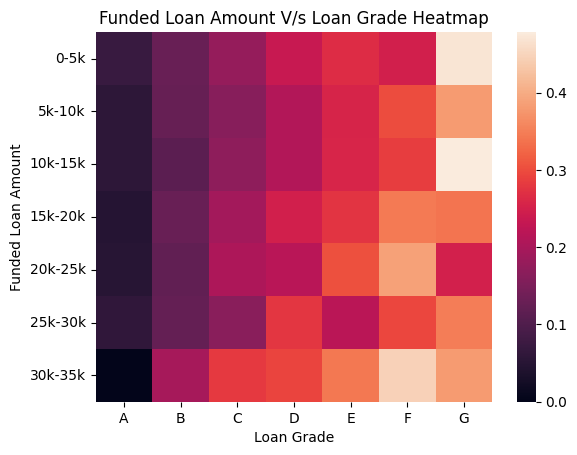

In [93]:
sns.heatmap(pd.pivot_table(data=loandata,index='funded_amnt_batch',columns='grade',values='loan_status_group'))
plt.title('Funded Loan Amount V/s Loan Grade Heatmap')
plt.xlabel('Loan Grade')
plt.ylabel('Funded Loan Amount')
plt.show()

#### 1.3 Funded Loan Amount V/s Loan Purpose

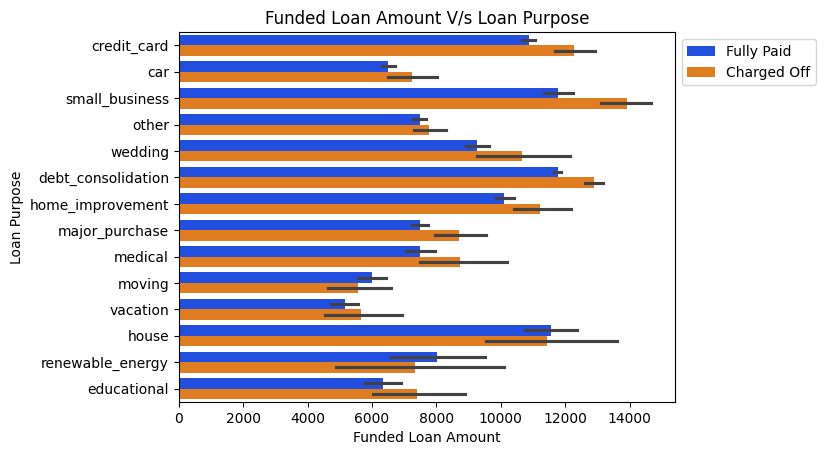

In [94]:
ax = sns.barplot(x = 'funded_amnt', y = 'purpose', data = loandata, palette = 'bright',
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Funded Loan Amount V/s Loan Purpose')
plt.ylabel('Loan Purpose')
plt.xlabel('Funded Loan Amount')
plt.show()

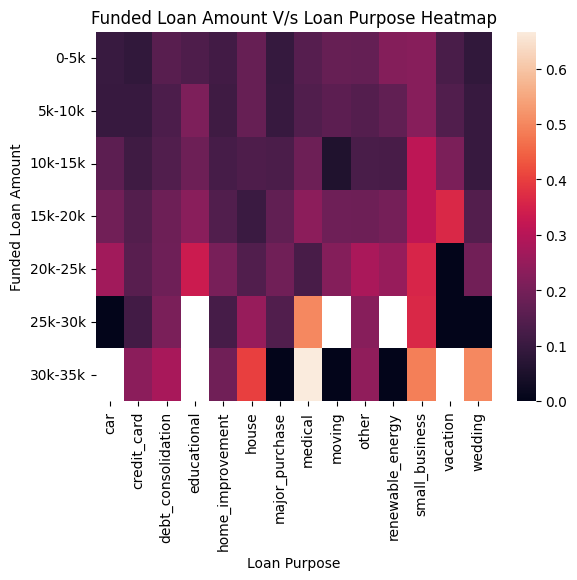

In [95]:
sns.heatmap(pd.pivot_table(data=loandata,index='funded_amnt_batch',columns='purpose',values='loan_status_group'))
plt.title('Funded Loan Amount V/s Loan Purpose Heatmap')
plt.xlabel('Loan Purpose')
plt.ylabel('Funded Loan Amount')
plt.show()

#### 1.4 Funded Loan Amount V/s Home Ownership

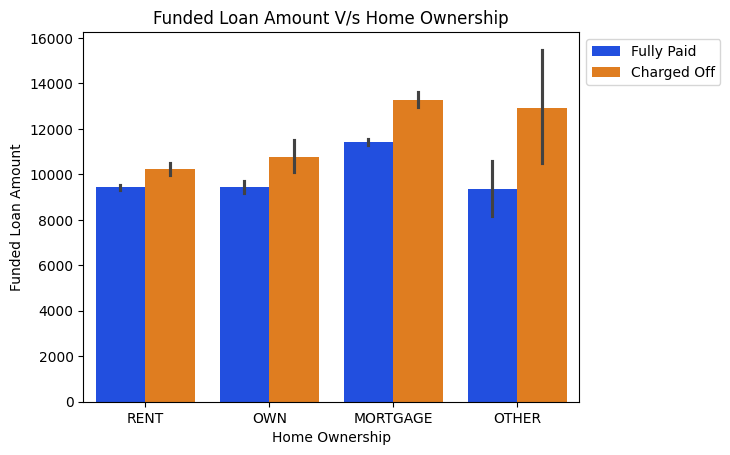

In [96]:
ax = sns.barplot(x = 'home_ownership', y = 'funded_amnt', data = loandata, palette = 'bright',
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Funded Loan Amount V/s Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Funded Loan Amount')
plt.show()

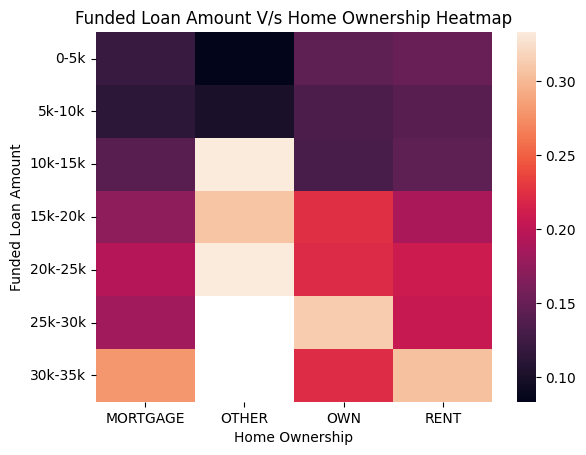

In [97]:
sns.heatmap(pd.pivot_table(data=loandata,index='funded_amnt_batch',columns='home_ownership',values='loan_status_group'))
plt.title('Funded Loan Amount V/s Home Ownership Heatmap')
plt.xlabel('Home Ownership')
plt.ylabel('Funded Loan Amount')
plt.show()

#### 1.5 Funded Loan Amount V/s Loan Term

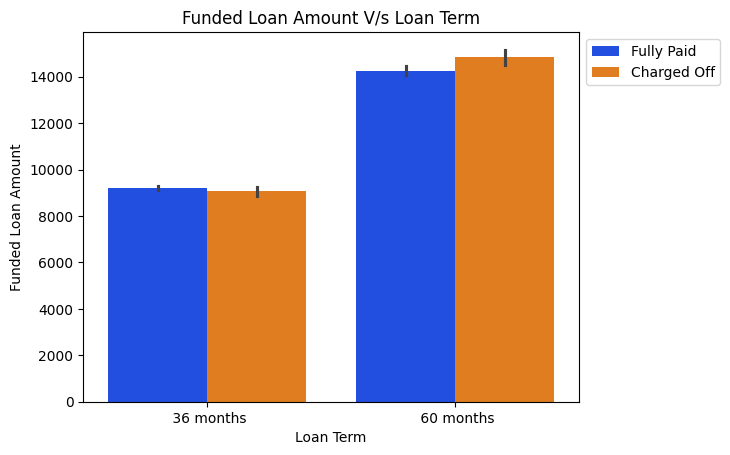

In [98]:
ax = sns.barplot(x = 'term', y = 'funded_amnt', data = loandata, palette = 'bright',
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Funded Loan Amount V/s Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Funded Loan Amount')
plt.show()

#### 1.6 Funded Loan Amount V/s Annual Income

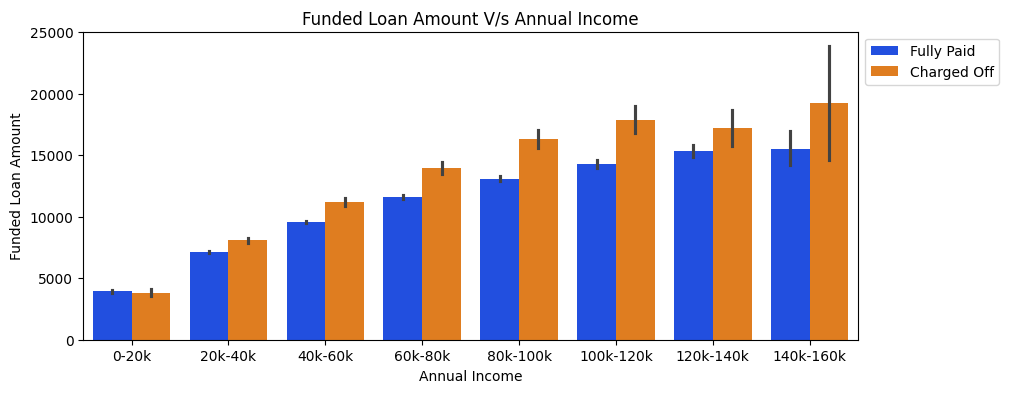

In [99]:
ax = sns.barplot(x = 'annual_inc_batch', y = 'funded_amnt', data = loandata, palette = 'bright',
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.gcf().set_size_inches(10, 4)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Funded Loan Amount V/s Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Funded Loan Amount')
plt.show()

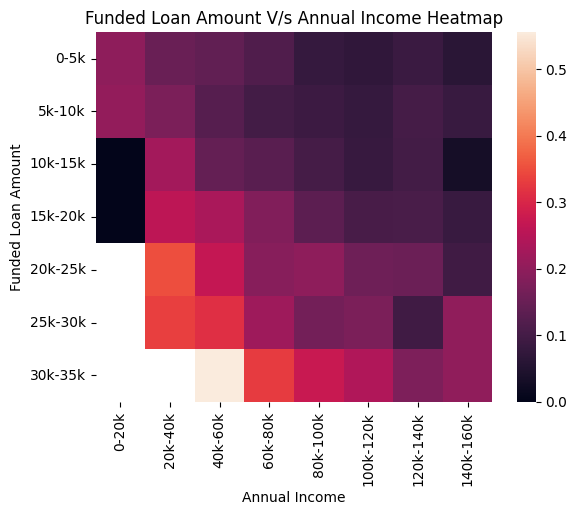

In [100]:
sns.heatmap(pd.pivot_table(data=loandata,index='funded_amnt_batch',columns='annual_inc_batch',values='loan_status_group'))
plt.title('Funded Loan Amount V/s Annual Income Heatmap')
plt.xlabel('Annual Income')
plt.ylabel('Funded Loan Amount')
plt.show()

### 2. Interest Rate

#### 2.1 Interest Rate V/s Loan Grade

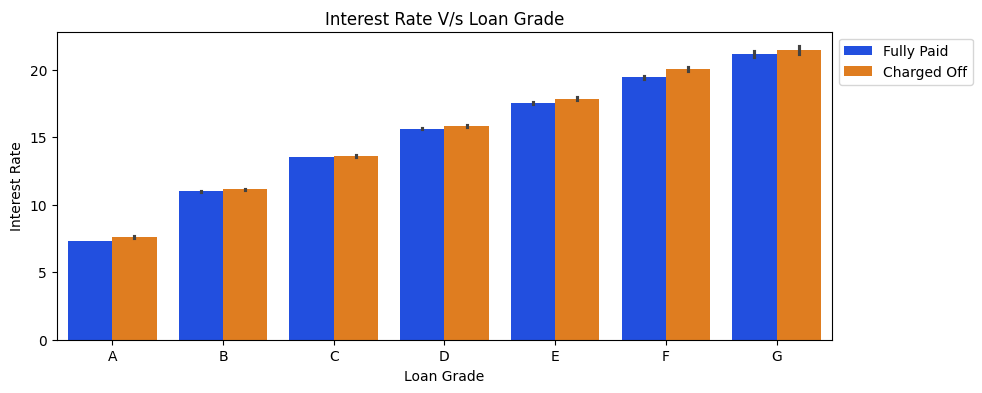

In [101]:
ax = sns.barplot(x = 'grade', y = 'int_rate', data = loandata, palette = 'bright', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.gcf().set_size_inches(10, 4)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Interest Rate V/s Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

#### 2.2 Interest Rate V/s Loan Term

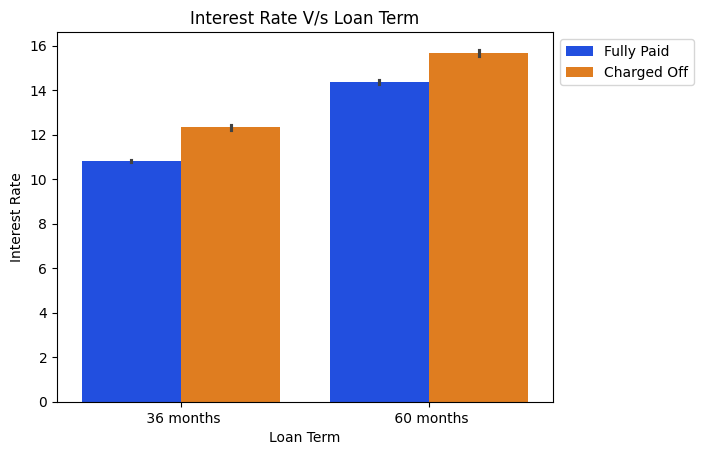

In [102]:
ax = sns.barplot(x = 'term', y = 'int_rate', data = loandata, palette = 'bright',
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Interest Rate V/s Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Interest Rate')
plt.show()

#### 2.3 Interest Rate V/s Annual Income

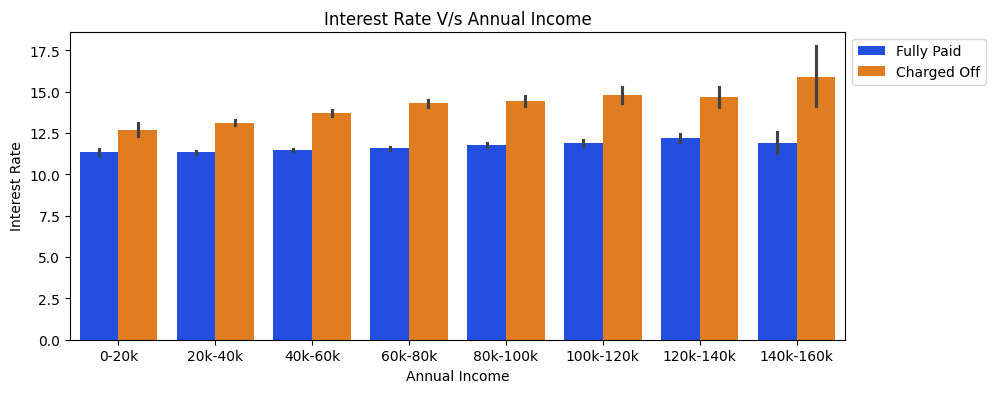

In [103]:
ax = sns.barplot(x = 'annual_inc_batch', y = 'int_rate', data = loandata, palette = 'bright',
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gcf().set_size_inches(10, 4)
plt.title('Interest Rate V/s Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Interest Rate')
plt.show()

#### 2.4 Interest Rate V/s Loan Purpose

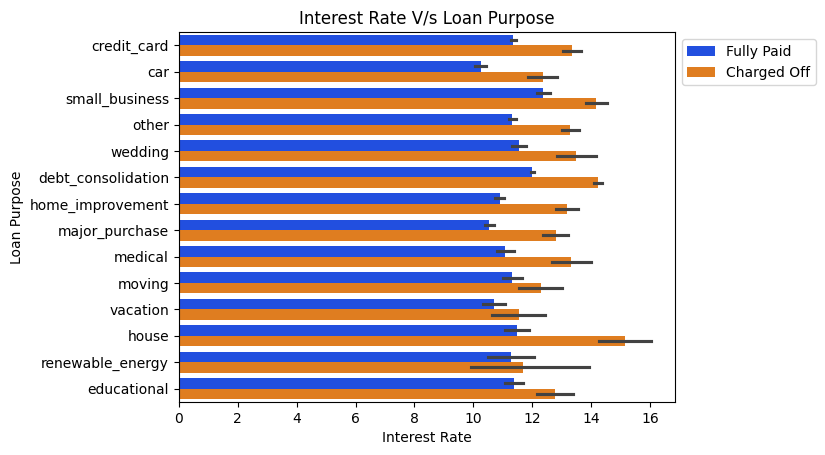

In [104]:
ax = sns.barplot(x = 'int_rate', y = 'purpose', data = loandata, palette = 'bright',
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Interest Rate V/s Loan Purpose')
plt.ylabel('Loan Purpose')
plt.xlabel('Interest Rate')
plt.show()

#### 2.5 Interest Rate V/s Home Ownership

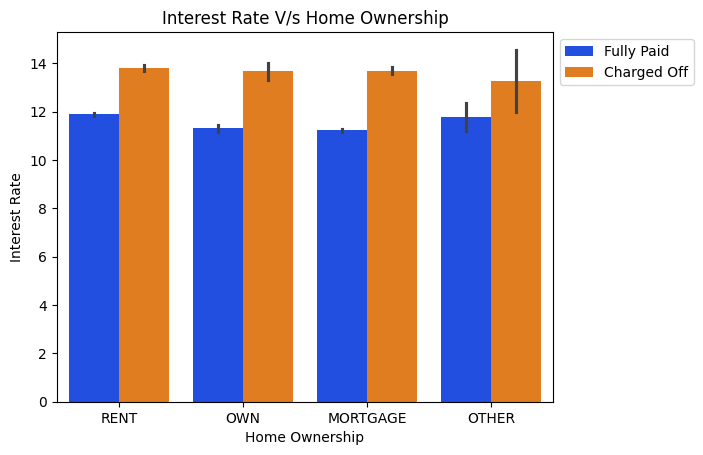

In [105]:
ax = sns.barplot(x = 'home_ownership', y = 'int_rate', data = loandata, palette = 'bright',
                   hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Interest Rate V/s Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Interest Rate')
plt.show()

### Results of Bivariate Analysis
#### The above analysis of the 'Fully Paid' and 'Charged Off' status based loan records for both funded_amnt and int_rate variable across other driver variables derives the following results. A loan record is highly probable of being 'Charged Off':
##### A. Funded Loan Amount:
 - A.1) If Funded Loan Amount is between 25000-35000 and Interest rate is between 15%-17.5%
 - A.2) If Funded Loan Amount is more than 15000 and Loan Grades are 'F' and 'G'
 - A.3) If Funded Loan Amount is more than 12000 with Purpose of Loan to invest in Small businesses, pay Credit card bills and clear Personal Debts
 - A.4) If Funded Loan Amount is more than 12000 with home ownership type is 'OTHER' and 'MORTGAGE'
 - A.5) If Funded Loan Amount is more than 14000 for Loan Term of 60 months
 - A.6) If Funded Loan Amount is more than 15000 whose Annual Income is more than 80000
##### B. Interest Rate:
 - B.1) If Interest Rate is more than 20% and Loan Grades is 'G'
 - B.2) If Interest Rate is more than 14% for Loan Term of 60 months
 - B.3) If Interest Rate is more than 15% whose Annual Income is more than 140000
 - B.4) If Interest Rate is more than 14% with Purpose of Loan to invest in Small businesses, House maintenance and clear Personal Debts
 - B.5) If Interest Rate is more than 12% with home ownership type is 'RENT' and 'MORTGAGE'